# **Rapport de travaux pratiques d'informatique**

## **Equations Differentiel d'ordre I**

### **I.1. Aspect théorique**

- On appelle équation différentielle d'ordre 1 toute équation de la forme :

$$
y^{\prime}=f(t, y)
$$

$\times$ l'inconnue $y: I \rightarrow \mathbb{R}$ est une fonction définie et dérivable sur un intervalle $I$ de $\mathbb{R}$,

$\times f: I \times \mathbb{R} \mapsto \mathbb{R}$ est une fonction définie sur $I \times \mathbb{R}$.

- On appelle problème de Cauchy en $\left(t_{0}, y_{0}\right) \in I \times \mathbb{R}$ le système :

$$
\left\{\begin{array}{l}
y^{\prime}=f(t, y) \\
y\left(t_{0}\right)=y_{0}
\end{array}\right.
$$

Sous certaines conditions (par exemple le caractère $\mathcal{C}^{1}$ de $f$ ), on peut démontrer que le problème de Cauchy possède une unique solution.

### **I.2. Aspect pratique**

#### **I.2.a Résolution des équations différentielles linéaires d'ordre 1**

Le théorème précédent (dit de Cauchy-Lipschitz) affirme que le problème de Cauchy admet une unique solution. Cependant, cette solution n'admet pas forcément une expression simple.

La forme de la fonction $f$ permet parfois de pouvoir expliciter les solutions.

- On appelle équation différentielle linéaire d'ordre 1 toute équation de la forme :

$$
y^{\prime}+a(t) y=b(t)
$$

$\times$ l'inconnue $y: I \rightarrow \mathbb{R}$ est une fonction définie et dérivable sur un intervalle $I$ de $\mathbb{R}$,

$\times$ les fonctions $a: I \rightarrow \mathbb{R}$ et $b: I \rightarrow \mathbb{R}$ sont définies et continues sur l'intervalle $I$,

$\times$ lorsque $b=0$ (la fonction $b$ est identiquement nulle), on dit que l'équation est homogène.

- Le problème de Cauchy $\left\{\begin{array}{l}y^{\prime}=b-a y \\ y\left(t_{0}\right)=y_{0}\end{array}\right.$ admet une unique solution $y$ définie sur $I$ dont

l'expression est :

$$
\forall t \in I, y(t)=y_{0} \exp \left(-\int_{t_{0}}^{t} a(s) d s\right)
$$

- La solution de l'équation générale (avec second membre) s'obtient, en vertu du principe de superposition des solutions, par l'ajout d'une solution particulière. Cette solution particulière est déterminée :

$\times$ soit car il existe une solution évidente,

(on est aussi parfois amené à chercher une solution particulière d'une certaine forme)

$\times$ soit à l'aide de la méthode de variation de la constante.

(on procède alors par analyse-synthèse)

### **Exemple (Dynamique d'une population sans compétition pour la nourriture)**

En l'absence de prédateurs et avec une nourriture abondante, l'évolution d'une famille de lapins suit un modèle de Malthus :

$$
\left\{\begin{array}{l}
y^{\prime}=r y \\
y(0)=2
\end{array} \quad \text { où } r \in \mathbb{R}^{+}\right.
$$

Resolvons cette équation:

On se place sur $I=[0,+\infty[$.
- Il s'agit d'une équation homogène dont la solution est : $y(t)=C \mathrm{e}^{r t}$ où $C \in \mathbb{R}$.
- La condition initiale impose que: $y(0)=2=C$.
- Ce problème de Cauchy admet donc pour unique solution la fonction $y: I \rightarrow \mathbb{R}$ définie par : $\forall t \in I, y(t)=2 \mathrm{e}^{r t}$

On souhaite maintenant obtenir la représentation graphique de cette fonction.

- La courbe représentative d'une fonction peut se tracer à l'aide de la fonction plot de la bibliothèque matplotlib.
- Le tracé d'une fonction se fait «point par point». Ainsi, seul un nombre fini de points du graphe est représenté. Cependant, la puissance de calcul permet que ce nombre soit suffisamment grand pour fournir une très bonne approximation de la courbe souhaitée. Le nuage de points obtenu est alors complété en reliant les paires de points successifs, ce qui permet d'obtenir un tracé continu

Représentons la solution du système de Malthus pour $r_{1}=$ $\ln (2)$ et $r_{2}=1$. La première courbe est représentée en rouge et la seconde en bleu. On effectue le tracé sur l'intervalle $[0,10]$.

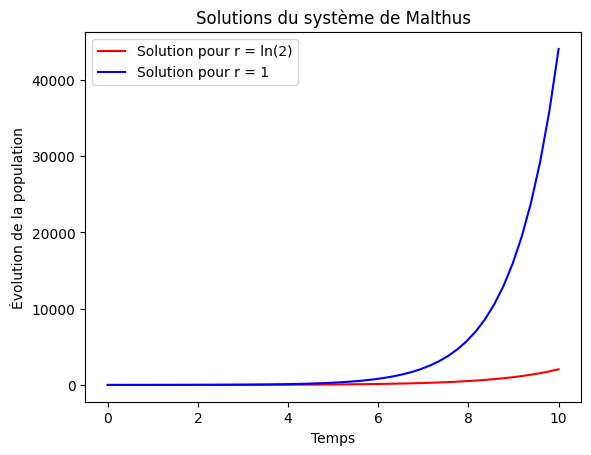

In [17]:
import numpy as np    
import matplotlib.pyplot as plt    


r1 = np.log(2)    
r2 = 1    

X = np.linspace(0, 10)    

Y1 = 2 * np.exp(r1 * X)    
Y2 = 2 * np.exp(r2 * X)    

plt.clf()    

plt.plot(X, Y1, color="red", label="Solution pour r = ln(2)")    
plt.plot(X, Y2, color="blue", label="Solution pour r = 1")   
plt.xlabel("Temps")  
plt.ylabel("Évolution de la population")   
plt.title("Solutions du système de Malthus")    
plt.legend()    

plt.show()


#### **I.2.b Résolution approchée par la méthode d'Euler**

Les équations différentielles n'ont pas toujours de solutions explicites. Cependant, en tout point, on peut connaître la valeur approchée de la solution à un problème de Cauchy.

Pour ce faire, on utilise des méthodes numériques telles que la méthode d'Euler.

**Principe de la méthode d'Euler**

On cherche ici à connaître une solution approchée d'un problème de Cauchy $\left\{\begin{array}{l}y^{\prime}=f(t, y) \\ y\left(t_{0}\right)=y_{0}\end{array}\right.$ sur un intervalle $I=[0, R]$ où $R>0$.

- On commence par découper l'intervalle $[0, R]$ à l'aide de $N+1$ points régulièrement espacés d'un pas de $h=\frac{R}{N}$.

$$
t_{0}=0, \quad t_{1}=h, \quad t_{2}=2 h, \ldots, \quad t_{k}=k h, \ldots, \quad t_{N}=R
$$

- On cherche alors à déterminer, pour tout $k \in \llbracket 0, N \rrbracket$, une valeur $y_{k}$ telle que $y_{k} \simeq y\left(t_{k}\right)$.

( $y_{k}$ est une valeur approchée de $y\left(t_{k}\right)$ )

Pour ce faire, on approche la fonction $f$ par une constante sur chaque sous-intervalle de la subdivision. Plus précisément, on écrit :

$$
\forall t \in\left[t_{k}, t_{k+1}\right], f(t, y(t)) \simeq f\left(t_{k}, y\left(t_{k}\right)\right) \simeq f\left(t_{k}, y_{k}\right)
$$

(cela correspond à l'approximation faite dans la méthode des rectangles)

- Les valeurs de $t_{k}$ s'obtiennent en remarquant que :

$$
y\left(t_{k+1}\right)-y\left(t_{k}\right)=\int_{t_{k}}^{t_{k+1}} y^{\prime}(t) d t=\int_{t_{k}}^{t_{k+1}} f(t, y(t)) d t
$$

- Avec les approximations mentionnées, on est amené à poser :

$$
y_{k+1}-y_{k}=\int_{t_{k}}^{t_{k+1}} f\left(t_{k}, y\left(t_{k}\right)\right) d t=\left(t_{k+1}-t_{k}\right) \times f\left(t_{k}, y\left(t_{k}\right)\right)
$$

Autrement dit, on considère :

$$
\forall k \in \llbracket 0, N-1 \rrbracket, \quad y_{k+1}=y_{k}+h \times f\left(t_{k}, y_{k}\right)
$$

- Écrivons en Python la fonction euler( $f, y 0, R, N)$ qui renvoie le couple ( $T, Y$ ) où $T$ est la liste des points $t_{k}$ et $\mathrm{Y}$ est la liste des points $y_{k}$.

In [18]:
def euler(f, y0, R, N):
    h = R/N   
    T = np.linspace(0, R, N+1)   
    Y = np.zeros(N+1)    
    Y[0] = y0   
    for k in range(N):   
        Y[k+1] = Y[k] + h * f(T[k], Y[k])   
    return (T, Y)    


On souhaite maintenant tester la fonction Euler sur le système de Malthus précédent.

Pour ce faire, il suffit essentiellement d'écrire la fonction $f:(t, y) \mapsto f(t, y)$.

- Écrivons en Python la fonction $f$ de l'exemple I.2.a) de deux manières différentes : avec le mot clé def et avec le mot clé lambda.

In [19]:
r = np.log(2)

def f(t, y):
    return (r*y)

In [20]:
r = np.log(2)
fbis = lambda t, y : r * y

- Quel est l'intérêt de la définition avec le mot clé lambda?

La définition avec lambda correspond à l'écriture mathématique $(t, y) \mapsto r \times y$. Elle ne nécessite pas que l'on nomme cette fonction.

- Testons la fonction Euler sur l'exemple.

On se place sur l'intervalle $[0,10](R=10)$ et on trace sur le même graphique la solution obtenue avec une subdivision en 10 points, en 100 points et en 1000 points.

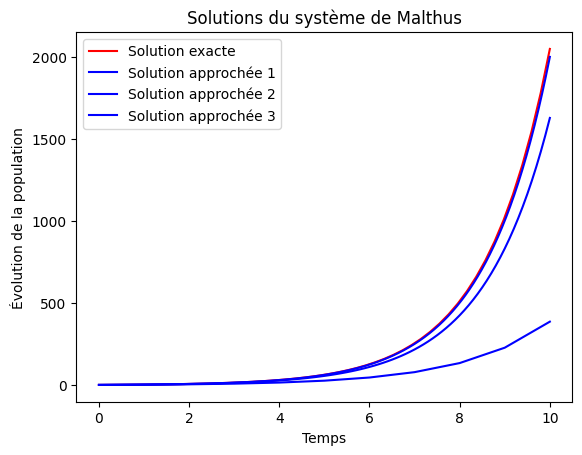

In [21]:
r = np.log(2)     
R = 10            
N1 = 10           
N2 = 100         
N3 = 1000        

X = np.linspace(0, 10)   
(T1, Y1) = euler(lambda t,y : r * y, 2, R, N1)   
(T2, Y2) = euler(lambda t,y : r * y, 2, R, N2)    
(T3, Y3) = euler(lambda t,y : r * y, 2, R, N3)   

Y = 2 * np.exp(r * X)    

plt.clf()     
plt.plot(X, Y, color = "red", label = "Solution exacte")     
plt.plot(T1, Y1, color = "blue", label = "Solution approchée 1")  
plt.plot(T2, Y2, color = "blue", label = "Solution approchée 2")   
plt.plot(T3, Y3, color = "blue", label = "Solution approchée 3")   

plt.xlabel("Temps")    
plt.ylabel("Évolution de la population")    
plt.title("Solutions du système de Malthus")   
plt.legend()   
plt.show()      


**Remarque**

- L'exemple précédent a un intérêt pratique : comme l'on sait déterminer de manière explicite la solution exacte, on peut la comparer à la méthode d'Euler pour se convaincre de son bon fonctionnement.

- Évidemment, cette utilisation est artificielle. La méthode d'Euler est utilisée pour trouver des solutions approchées à des équations différentielles plus compliquées.

**Exemple**

L'équation différentielle: $y^{\prime}=\sin (t y)$ est dite non autonome.

En effet, la fonction $f:(t, y) \mapsto f(t, y)=\sin (t y)$ dépend de $t$.

- Testons la fonction Euler sur ce nouvel exemple.

On se place sur l'intervalle $[0,10](R=15)$ et on choisira $y_{0}=12$ et $N=1000$.

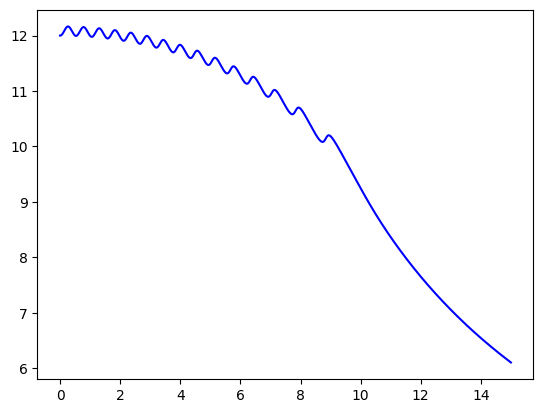

In [22]:
R = 15
N = 1000

(T, Y) = euler(lambda t,y : np.sin(t*y), 12, R, N)

plt.clf()
plt.plot(T, Y, color = "blue", label = "Solution app. système NA")
plt.show()

## **II. Équations différentielles d'ordre 2**

### **II.1. Aspect théorique**

- On appelle équation différentielle d'ordre 2 toute équation de la forme :

$$
y^{\prime \prime}=f\left(t, y, y^{\prime}\right)
$$

$\times$ l'inconnue $y: I \rightarrow \mathbb{R}$ est une fonction définie et deux fois dérivable sur un intervalle $I$ de $\mathbb{R}$,

$\times f: I \times \mathbb{R} \times \mathbb{R} \mapsto \mathbb{R}$ est une fonction définie sur $I \times \mathbb{R} \times \mathbb{R}$.

- On appelle problème de Cauchy en $\left(t_{0}, y_{0}, \dot{y_{0}}\right) \in I \times \mathbb{R} \times \mathbb{R}$ le système :

$$
\left\{\begin{array}{l}
y^{\prime \prime}=f\left(t, y, y^{\prime}\right) \\
y\left(t_{0}\right)=y_{0} \\
y^{\prime}\left(t_{0}\right)=\dot{y}_{0}
\end{array}\right.
$$

Sous certaines conditions (par exemple le caractère $\mathcal{C}^{1}$ de $f$ ), on peut démontrer que le problème de Cauchy possède une unique solution.

### **II.2. Aspect pratique**

#### **II.2.a Résolution des équations différentielles linéaires d'ordre 2 à coefficients constants**

Le théorème précédent (dit de Cauchy-Lipschitz) affirme que le problème de Cauchy admet une unique solution. Cependant, cette solution n'admet pas forcément une expression simple.

La forme de la fonction $f$ permet parfois de pouvoir expliciter les solutions.
- On appelle équation différentielle linéaire d'ordre 2 à cœefficients constants toute équation de la forme :

$$
y^{\prime \prime}+a y^{\prime}+b y=m
$$

$\times$ l'inconnue $y: I \rightarrow \mathbb{R}$ est une fonction définie et deux fois dérivable sur un intervalle $I$ de $\mathbb{R}$, $\times a$ et $b$ sont des réels,

$\times m: t \mapsto m(t)$ est une fonction continue sur $I$.
- Le problème de Cauchy $\left\{\begin{array}{l}y^{\prime \prime}=-a y^{\prime}-b y \\ y\left(t_{0}\right)=y_{0} \\ y^{\prime}\left(t_{0}\right)=y_{0}\end{array}\right.$ admet une unique solution $y$ sur $I$ dont l'expression est donnée en fonction des solutions $\lambda$ et $\mu$ de l'équation caractéristique $r^{2}+a r+b=0$. (cf cours)
- La solution de l'équation générale (avec second membre) s'obtient, en vertu du principe de superposition des solutions, par l'ajout d'une solution particulière. Cette solution particulière est déterminée :

$\times$ soit car il existe une solution évidente,

(on est aussi parfois amené à chercher une solution particulière d'une certaine forme)

$\times$ soit à l'aide de la méthode de variation des constantes.

(on procède alors par analyse-synthèse)

#### **II.2.b Résolution approchée à l'aide de la méthode d'Euler**

La méthode précédente peut s'adapter au cas de l'ordre 2.

En effet, en notant $Z(t)=\left(\begin{array}{c}y(t) \\ y^{\prime}(t)\end{array}\right)$ on obtient $Z^{\prime}(t)=\left(\begin{array}{c}y^{\prime}(t) \\ y^{\prime \prime}(t)\end{array}\right)$ et l'équation différentielle d'ordre 2 précédente peut s'écrire sous la forme :

$$
\left(\begin{array}{l}
y^{\prime}(t) \\
y^{\prime \prime}(t)
\end{array}\right)=\left(\begin{array}{cc}
0 & 1 \\
-b & -a
\end{array}\right) \times\left(\begin{array}{l}
y(t) \\
y^{\prime}(t)
\end{array}\right)
$$

Autrement dit: $Z^{\prime}=A \times Z$

On a alors de nouveau affaire à une équation différentielle d'ordre 1 !

L'idée est donc d'adapter la méthode d'Euler scalaire précédente à ce cas matriciel.

Commençons par les opérations sur les tableaux de la bibliothèque Numpy.

- Quel est le résultat renvoyé par l'appel $(1,2)+(4,5)$ ? Et $[1,2]+[4,5]$ ? Comment se nomme l'opérateur + dans ce cas?
    - On obient $(1,2,4,5)$ et $[1,2,4,5]$.
    - Cette opération se nomme la concaténation.

- Quel est le résultat de l'appel $2 \star n p . a r r a y([0,1])+n p . \operatorname{array}([3,0])$ ? Commenter.
    - On obtient alors np. array $[3,2]$.
    - Pour les objets de type np.array, il y a surcharge de l'opérateur + afin qu'il effectue la somme.

- Adaptons la méthode d'Euler pour résoudre une équation du type $Z^{\prime}=A \times Z$. Il s'agit donc d'écrire en Python la fonction euler_ordre2 ( $f, y 0, y p 0, R, N$ ) qui renvoie le couple ( $\mathrm{T}, \mathrm{Z}$ ) où $\mathrm{T}$ est la liste des points $t_{k}$ et $\mathrm{Z}$ est la liste des vecteurs $\left(\begin{array}{c}y_{k} \\ \dot{y_{k}}\end{array}\right)$.

- La fonction euler_ordre2 est essentiellement la même que la fonction euler. La seule différence réside dans le fait que $\mathrm{Z}$ contient des objets de type array et plus des flottants.

In [23]:
def euler_ordre2(f, y0, yp0, R, N):
    h = R/N
    # Attention : N intervalles, N+1 points
    T = np.linspace(0, R, N+1)
    # Il est important que les objet dans Y soient de type array
    Z = np.zeros(N+1, dtype = np.ndarray)
    Z[0] = np.array([y0, yp0])
    for k in range(N):
        Z[k+1] = Z[k] + h * f(T[k], Z[k])
    return (T, Z)

On souhaite maintenant tester cette méthode sur l'équation différentielle $y^{\prime \prime}+y=0$ avec les conditions initiales $y(0)=0$ et $y^{\prime}(0)=1$, dont on sait que la solution est la fonction sinus.

- Déterminons la fonction $f:(t, Z) \mapsto f(t, Z)$ dans ce cas

    
- Ici, on a $y^{\prime \prime}=-y$. Cette équation seréécrit :
$$
\left(\begin{array}{l}
y^{\prime} \\
y^{\prime \prime}
\end{array}\right)=\left(\begin{array}{cc}
0 & 1 \\
-1 & 0
\end{array}\right) \times\left(\begin{array}{l}
y \\
y^{\prime}
\end{array}\right) \quad\left(=\left(\begin{array}{l}
y^{\prime} \\
-y
\end{array}\right)\right)
$$


- Il s'agit donc de coder la fonction $f: I \times \mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$ telle que :

$$
\begin{array}{rlllll}
f: & I & \times & \mathbb{R}^{2} & \rightarrow & \mathbb{R}^{2} \\
& (t & , & \left.\left(\begin{array}{l}
u \\
v
\end{array}\right)\right) & \mapsto & \left(\begin{array}{r}
v \\
-u
\end{array}\right)
\end{array}
$$
- On peut la coder à l'aide de la construction lambda :

        lambda t, Z : np.array([Z[1], -Z[0] ])

Déduisons-en l'appel nécessaire pour obtenir la solution approchée au système de Cauchy $\left\{\begin{array}{l}y^{\prime \prime}+y=0 \\ y(0)=0 \\ y^{\prime}(0)=1\end{array}\right.$. On effectuera le tracé sur l'intervalle $[0,3 \pi]$ et on prendra $N=100$.

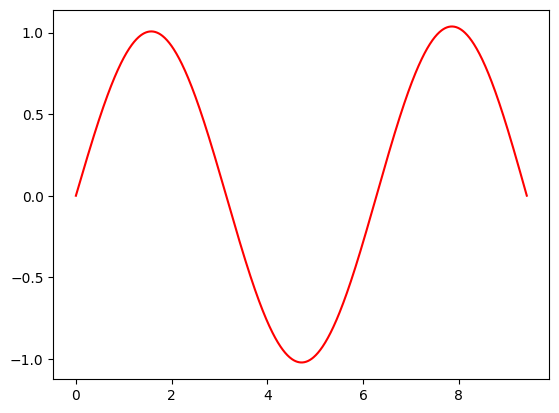

In [24]:
R=3 * np.pi
N = 1000
y0 = 0
yp0 = 1

(T,Z) = euler_ordre2(lambda t,Z : np.array([Z[1], -Z[0]]), y0, yp0, R, N)
Y = [vect[0] for vect in Z]

plt.plot(T, Y, color = "red")